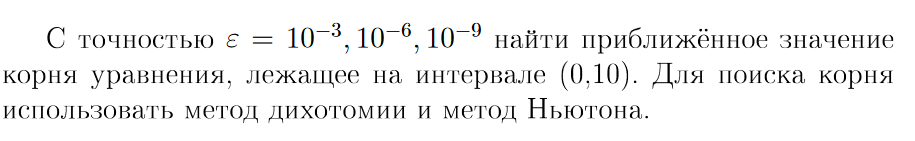

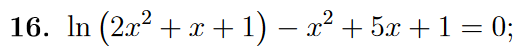

In [28]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import pandas as pd
# Просто нужные импорты

def f(x):
    return np.log(2*(x**2) + x + 1) - x**2 + 5*x + 1 
# Наша f(x)

def df(x):
    numerator = 4 * x + 1
    denominator = 2 * x**2 + x + 1
    return (numerator / denominator) - 2 * x + 5
# Производная от f(x)

epsilons = [1e-3, 1e-6, 1e-9]
# Наши точности

a, b = 0, 10
# Наши границы

In [29]:
def bisection(f, a, b, epsilon, max_iterations=1000):
    if f(a) * f(b) >= 0:
        print("Bisection method fails. f(a) and f(b) must have opposite signs.")
        return None
    roots = []
    epsilon_index = 0
    epsilon = epsilons[epsilon_index]
    iterations = 0
    while iterations < max_iterations and epsilon_index < len(epsilons):
        c = (a + b) / 2
        fc = f(c)
        if fc == 0 or (b - a) / 2 < epsilon:
            roots.append((epsilon, c))
            epsilon_index += 1
            if epsilon_index < len(epsilons):
                epsilon = epsilons[epsilon_index]
        if f(a) * fc < 0:
            b = c
        else:
            a = c
        iterations += 1
    return roots

# По сути метод сводится к тому, что мы бьем отрезок пополам и проверяем серединки половинок на 
# то, что они являются корнями. Если нет, то мы бьем половину, которая ближе к корню и делаем все
# то же самое до тех пор пока отрезок не становится меньше E. Ну и хардкап на кол-во итераций, чтобы
# мой ноутбук жил

In [30]:
def newton(f, df, x0, epsilon, max_iterations=1000):
    x_current = x0
    roots = []
    epsilon_index = 0
    epsilon = epsilons[epsilon_index]
    iterations = 0
    for _ in range(max_iterations):
        f_value = f(x_current)
        f_derivative = df(x_current)
        if f_derivative == 0:
            print("Derivative is zero. Newton's method fails.")
            return None
        x_next = x_current - f_value / f_derivative
        if abs(x_next - x_current) < epsilon:
            roots.append((epsilon, x_next))
            epsilon_index += 1
            if epsilon_index >= len(epsilons):
                break
            epsilon = epsilons[epsilon_index]
        x_current = x_next
        iterations += 1
    return roots

# А тут смысл в том, что мы пытаемся найти корень при помощи сходящейся последовательности.
# Первый ее член мы выбираем на рандом, а остальные вычисляются по формуле:
# x_n+1 =  x_n - f(x_n) / f'(x_n). 
# Вывести эту формулу опять же можно из Тейлора, но это грамостко.
# Хардкап на итерации за здоровье моего компьютера.

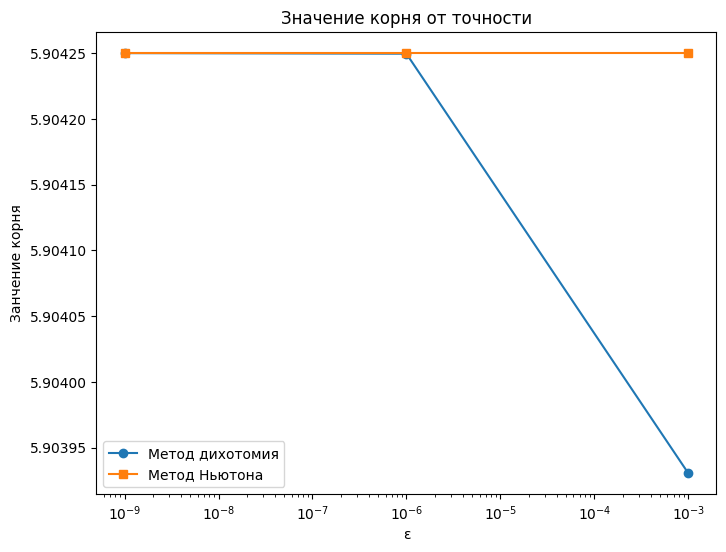


Combined Results:
           ε  Корень по дихтомии  Корень по Ньютону
1.000000e-03            5.903931            5.90425
1.000000e-06            5.904250            5.90425
1.000000e-09            5.904250            5.90425


In [31]:
bisection_roots = bisection(f, a, b, epsilons)
x0 = 5
newton_roots = newton(f, df, x0, epsilons)

bisection_eps, bisection_vals = zip(*bisection_roots)
newton_eps, newton_vals = zip(*newton_roots)

plt.figure(figsize=(8, 6))
plt.plot(bisection_eps, bisection_vals, 'o-', label='Метод дихотомия')
plt.plot(newton_eps, newton_vals, 's-', label="Метод Ньютона")
plt.xscale('log')
plt.xlabel('ε')
plt.ylabel('Занчение корня')
plt.title('Значение корня от точности')
plt.legend()
plt.show()

df_bisection = pd.DataFrame(bisection_roots, columns=['ε', 'Корень по дихтомии'])
df_newton = pd.DataFrame(newton_roots, columns=['ε', 'Корень по Ньютону'])
df_results = pd.merge(df_bisection, df_newton, on='ε')

print("\nCombined Results:")
print(df_results.to_string(index=False))